# Changing mobility and COVID-19 in NY state counties

This recreates a plot from Soucy et al (https://www.medrxiv.org/content/10.1101/2020.04.05.20054288v1, Fig. 2) using different datasets:

- US county-level mobility statistics from Descartes Labs (https://github.com/descarteslabs/DL-COVID-19)
- US county-level COVID-19 data from the New York Times (https://github.com/nytimes/covid-19-data)

Specifically it applies the method to counties of NY state (excluding New York City counties - partly because the NYT data does not break those down) that had at least 20 cumulative cases of COVID-10 reported by March 29 2020.

This is mainly a proof of concept that this is indeed relatively straight-forward using these datasets and the SciPy ecosystem.

The data is attributed as above. This code is released under an MIT license.

In [1]:
import numpy as np
import pandas as pd

In [2]:
nyt_us_counties_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
dl_us_mobility_url = "https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-mobility-daterow.csv"

us_counties = pd.read_csv(
    nyt_us_counties_url,
    dtype={"fips": str},
    parse_dates=["date"]
)
mobility = pd.read_csv(
    dl_us_mobility_url,
    dtype={'fips': str},
    parse_dates=['date']
)
us_counties.dtypes, mobility.dtypes

(date      datetime64[ns]
 county            object
 state             object
 fips              object
 cases              int64
 deaths             int64
 dtype: object,
 date            datetime64[ns]
 country_code            object
 admin_level              int64
 admin1                  object
 admin2                  object
 fips                    object
 samples                  int64
 m50                    float64
 m50_index                int64
 dtype: object)

In [3]:
week4_range = slice("2020-03-23", "2020-03-29")

us_counties_march_week4 = us_counties.set_index('date').loc[week4_range]
us_counties_march_week4

,county,state,fips,cases,deaths
date,,,,,
2020-03-23,Baldwin,Alabama,01003,3,0
2020-03-23,Calhoun,Alabama,01015,2,0
2020-03-23,Chambers,Alabama,01017,2,0
2020-03-23,Cullman,Alabama,01043,2,0
2020-03-23,Elmore,Alabama,01051,6,0
...,...,...,...,...,...
2020-03-29,Sheridan,Wyoming,56033,6,0
2020-03-29,Sublette,Wyoming,56035,1,0
2020-03-29,Sweetwater,Wyoming,56037,1,0


In [4]:
week2_range = slice("2020-03-09", "2020-03-15")

mobility_march_week2 = mobility.set_index("date").loc[week2_range]
mobility_march_week2

,country_code,admin_level,admin1,admin2,fips,samples,m50,m50_index
date,,,,,,,,
2020-03-09,US,1,Alabama,NaN,01,145037,10.901,103
2020-03-10,US,1,Alabama,NaN,01,143390,10.892,103
2020-03-11,US,1,Alabama,NaN,01,143775,10.954,103
2020-03-12,US,1,Alabama,NaN,01,141531,11.755,111
2020-03-13,US,1,Alabama,NaN,01,138766,12.269,116
...,...,...,...,...,...,...,...,...
2020-03-11,US,2,Wyoming,Uinta County,56041,345,4.402,140
2020-03-12,US,2,Wyoming,Uinta County,56041,348,4.233,135
2020-03-13,US,2,Wyoming,Uinta County,56041,345,5.904,188


In [5]:
us_counties_march_week4_ny = us_counties_march_week4[(us_counties_march_week4["state"] == "New York")]
us_counties_march_week4_ny

,county,state,fips,cases,deaths
date,,,,,
2020-03-23,Albany,New York,36001,127,0
2020-03-23,Allegany,New York,36003,2,0
2020-03-23,Broome,New York,36007,7,1
2020-03-23,Cayuga,New York,36011,2,0
2020-03-23,Chenango,New York,36017,3,0
...,...,...,...,...,...
2020-03-29,Warren,New York,36113,18,0
2020-03-29,Washington,New York,36115,7,0
2020-03-29,Wayne,New York,36117,12,0


In [6]:
mobility_march_week2_ny = mobility_march_week2[
    (mobility_march_week2["admin_level"] == 2) & (mobility_march_week2["admin1"] == "New York")
]
mobility_march_week2_ny

,country_code,admin_level,admin1,admin2,fips,samples,m50,m50_index
date,,,,,,,,
2020-03-09,US,2,New York,Albany County,36001,4583,4.742,99
2020-03-10,US,2,New York,Albany County,36001,4524,4.672,97
2020-03-11,US,2,New York,Albany County,36001,4513,4.800,100
2020-03-12,US,2,New York,Albany County,36001,4561,4.960,103
2020-03-13,US,2,New York,Albany County,36001,4254,4.958,103
...,...,...,...,...,...,...,...,...
2020-03-11,US,2,New York,Yates County,36123,320,6.208,89
2020-03-12,US,2,New York,Yates County,36123,293,6.859,98
2020-03-13,US,2,New York,Yates County,36123,275,11.208,161


In [7]:
def mean_daily_growth(series):
    return np.mean(series / series.shift(1) - 1)

us_counties_march_week4_ny_mean_growth = us_counties_march_week4_ny[["fips", "cases"]].groupby("fips").aggregate(
    max_cases=pd.NamedAgg(column="cases", aggfunc=np.max),
    mean_daily_growth=pd.NamedAgg(column="cases", aggfunc=mean_daily_growth)
)
us_counties_march_week4_ny_mean_growth

,max_cases,mean_daily_growth
fips,,
36001,205,0.083889
36003,6,0.333333
36007,29,0.271022
36009,4,3.000000
36011,2,0.000000
36013,5,1.000000
36015,15,1.382468
36017,15,0.368056
36019,13,0.142929


In [8]:
mobility_march_week2_ny_mean = mobility_march_week2_ny.groupby("fips").mean()
mobility_march_week2_ny_mean

,admin_level,samples,m50,m50_index
fips,,,,
36001,2.0,4312.428571,3.917286,81.428571
36003,2.0,434.857143,4.261000,75.142857
36005,2.0,13846.714286,1.687429,63.000000
36007,2.0,2514.285714,3.540714,77.714286
36009,2.0,1055.428571,4.189571,76.285714
...,...,...,...,...
36115,2.0,730.285714,6.400286,83.857143
36117,2.0,1227.000000,8.862000,77.571429
36119,2.0,12477.142857,4.577000,69.714286


In [9]:
min_cases_threshold = 20

merged = pd.merge(
    us_counties_march_week4_ny_mean_growth[
        us_counties_march_week4_ny_mean_growth["max_cases"] >= min_cases_threshold
    ] * 100,
    mobility_march_week2_ny_mean["m50_index"],
    on="fips"
)
merged

,max_cases,mean_daily_growth,m50_index
fips,,,
36001,20500,8.388871,81.428571
36007,2900,27.102155,77.714286
36021,2300,15.969308,66.714286
36027,32000,21.428834,75.000000
36029,38000,29.877428,84.285714
36053,2400,36.756802,89.142857
36055,21900,19.467137,84.000000
36059,644500,17.568555,70.428571
36063,3800,26.445511,86.428571


In [10]:
slope, intercept = np.polyfit(merged.m50_index, np.log(merged.mean_daily_growth), deg=1)
fit_x = np.linspace(60, 90, 100)
fit_y = np.exp(slope * fit_x + intercept)

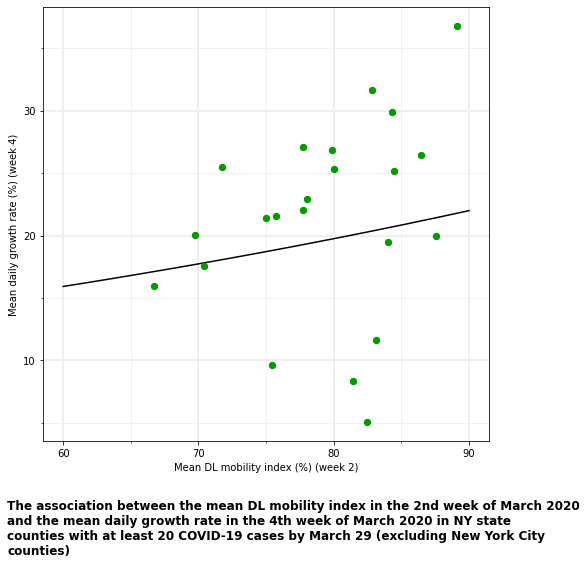

In [11]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from textwrap import wrap

ax = merged.plot.scatter(
    x="m50_index",
    y="mean_daily_growth",
    s=40,
    c="#090",
    figsize=(8, 8),
    zorder=1000
)
ax.plot(fit_x, fit_y, c="#000")
ax.set_title(
    "\n".join(wrap("The association between the mean DL mobility index in the 2nd week of March 2020 and the mean daily growth rate in the 4th week of March 2020 in NY state counties with at least 20 COVID-19 cases by March 29 (excluding New York City counties)", 80)),
    y=-0.27, x=-0.08, loc="left", fontweight="bold", wrap=True
)
ax.set_ylabel("Mean daily growth rate (%) (week 4)")
ax.set_xlabel("Mean DL mobility index (%) (week 2)")
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.grid(which='major', color='#eee', linewidth=2)
ax.grid(which='minor', color='#eee')